------------------
# Сравнение polars и pandas

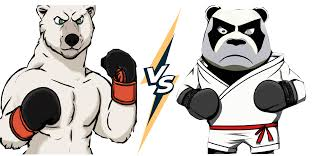

**Импорт библиотек**

In [2]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

Увеличим датасет до 1 миллиона наблюдений за счет его дубликатов.

In [3]:
df = pd.read_csv('abalone.csv')

In [4]:
df_big = df.copy()

for _ in range(300):
  df_big = pd.concat([df_big, df])

df_big.to_csv('abalone_big.csv', index=False)

**Загрузка данных**

In [5]:
%%time
df_pl = pl.read_csv('abalone_big.csv')

CPU times: total: 672 ms
Wall time: 226 ms


In [6]:
%%time
df_pd = pd.read_csv('abalone_big.csv')

CPU times: total: 734 ms
Wall time: 704 ms


*polars справился быстрее: 1-0*

**Фильтрация данных**

In [7]:
%%time
pl_res = df_pl.filter((pl.col('Sex') == 'M') & (pl.col('Diameter') > 0.265))

CPU times: total: 46.9 ms
Wall time: 16.1 ms


In [8]:
%%time
pd_res = df_pd[(df_pd['Sex'] == 'M') & (df_pd['Diameter'] > 0.265)]

CPU times: total: 93.8 ms
Wall time: 97.4 ms


*polars справился быстрее: 2-0*

**Агрегация данных**

In [9]:
%%time
df_pl.groupby(by='Sex').agg(pl.col('Whole weight').mean())

CPU times: total: 109 ms
Wall time: 29.9 ms


<timed eval>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


Sex,Whole weight
str,f64
"""I""",0.430636
"""M""",0.982599
"""f""",0.886241
"""F""",1.043791


In [10]:
%%time
df_pd.groupby(by='Sex').agg({'Whole weight' : 'mean'})

CPU times: total: 78.1 ms
Wall time: 69 ms


,Whole weight
Sex,
F,1.043791
I,0.430636
M,0.982599
f,0.886241


*нельзя сказать, что polars справился быстрее - ничья: 2-0*

На дасете размером (1257277, 9) polars показал показатели лучше, чем pandas: в загрузке данных и в фильтрации, по агрегации данных результаты сопоставимы.